In [1]:
#Week 6 Assignment
#Jenna Honeywell 
#MSDS 422

In [2]:
#Tested neural network structures should be explored within a benchmark experiment, a factorial design with at least two levels
#on each of two experimental factors (at least a 2x2 completely crossed design).  You will build your models on train.csv and
#submit your forecasts for test.csv to Kaggle.com.

#An example experiment could include two values for the number of nodes per inner layer and two values for the number of
#inner layers. Various machine learning hyperparameter settings may be used.

In [3]:
import pandas as pd
import numpy as np
import time
import os.path

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import sklearn.linear_model 
from time import time
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, f1_score as f1 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow_core.estimator import inputs
from numpy.random import seed
seed(42)
#from tensorflow import set_random_seed
#set_random_seed(42)



In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# **Quick EDA**

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.info()
print(train['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


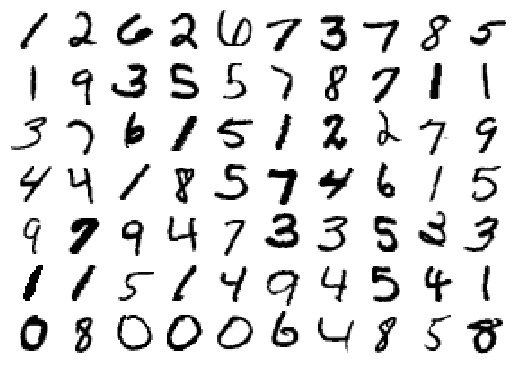

In [9]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(9,9))
example_images = np.r_[x_train[:12000:600], x_train[13000:30600:600], x_train[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [10]:
#Creating train/test sets
x_train = train.drop(labels = ["label"], axis=1) 
y_train = train["label"]
x_test = test

In [11]:
#Scaling features and creating arrays
x_array = x_train.values.reshape(-1, 28*28) / 255.0

y_train = y_train
y_array = y_train.values

test_array = x_test.values.reshape(-1, 28*28) / 255.0

#One hot encoding 
keras_y=tf.keras.utils.to_categorical(y_array,10)

# **Neural Networks**

Models: 
- 4 layers, 300 nodes
- 6 layers, 300 nodes
- 4 layers, 500 nodes
- 6 layers, 500 nodes

### **4 layers, 300 nodes**

Due to the nature of the Kaggle competition, the training set is used for training the model and for validation.  There is no true test score generated by the below models.  Test scores for all models were generated by submitting predicted test set values CSVs to Kaggle.com.

The below model has 4 dense layers - 3 of the layers have 300 nodes and the output layer has 10 nodes.  The model was trained using 20 epochs.

In [12]:
nn1_start_time = time()

model1 = tf.keras.Sequential()
model1.add(layers.Dense(300, input_dim=784, activation='relu')) #layer 1 
model1.add(layers.Dense(300, activation='relu')) #layer 2
model1.add(layers.Dense(300, activation='relu')) #layer 3
model1.add(layers.Dense(10, activation='softmax')) #output layer
model1.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history=model1.fit(x_array, keras_y, epochs=20, validation_data=(x_array, keras_y))

nn1_elapsed_time = time() - nn1_start_time
print("Time elapsed: {:.3f}".format(nn1_elapsed_time))

Train on 42000 samples, validate on 42000 samples
Epoch 1/20
42000/42000 [==============================] - 7s 174us/sample - loss: 0.2262 - categorical_accuracy: 0.9307 - val_loss: 0.1075 - val_categorical_accuracy: 0.9661
Epoch 2/20
42000/42000 [==============================] - 7s 162us/sample - loss: 0.1005 - categorical_accuracy: 0.9690 - val_loss: 0.0896 - val_categorical_accuracy: 0.9717
Epoch 3/20
42000/42000 [==============================] - 7s 170us/sample - loss: 0.0687 - categorical_accuracy: 0.9780 - val_loss: 0.0408 - val_categorical_accuracy: 0.9875
Epoch 4/20
42000/42000 [==============================] - 7s 167us/sample - loss: 0.0529 - categorical_accuracy: 0.9834 - val_loss: 0.0557 - val_categorical_accuracy: 0.9833
Epoch 5/20
42000/42000 [==============================] - 7s 173us/sample - loss: 0.0433 - categorical_accuracy: 0.9863 - val_loss: 0.0316 - val_categorical_accuracy: 0.9898
Epoch 6/20
42000/42000 [==============================] - 7s 176us/sample - loss

In [13]:
y_pred1 = model1.predict_classes(test)
print(y_pred1[:10])

df_nn1=pd.DataFrame({'ImageID' : pd.Series(range(1,28001)), 'Label': y_pred1})
df_nn1.to_csv('nn1.csv', index=False)

#Kaggle .98028 - username: Jenna Honeywell

[2 0 9 0 3 7 0 3 0 3]


In [14]:
mypred1=model1.predict(x_array)
mypred1=mypred1.astype(int)
delta=abs(mypred1-keras_y.astype(int))
bynum=sum(delta)
tot=sum(bynum)
print("Total Error %: ", tot/(10000*10), "\nTotal Misclass by #", bynum)

Total Error %:  0.07916 
Total Misclass by # [ 311  214  400  910  532 1341 1054  536  861 1757]


In [15]:
mytable1=pd.DataFrame(history.history)
mytable1

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
0,0.226212,0.930667,0.107486,0.966143
1,0.100467,0.969000,0.089649,0.971690
2,0.068675,0.978000,0.040802,0.987476
3,0.052867,0.983405,0.055743,0.983333
4,0.043319,0.986310,0.031616,0.989786
5,0.036699,0.988667,0.030048,0.990905
6,0.035822,0.988619,0.020640,0.993571
7,0.025710,0.991929,0.017654,0.994286
8,0.025908,0.991976,0.015257,0.995167
9,0.024782,0.992881,0.013392,0.995881


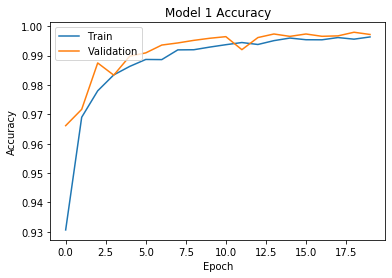

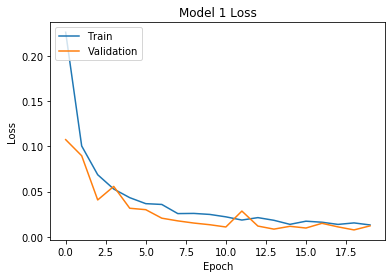

In [16]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **6 layers, 300 nodes**

The below model has 6 dense layers - 5 of the layers have 300 nodes and the output layer has 10 nodes.  The model was trained using 20 epochs.

In [17]:
nn2_start_time = time()

model2 = tf.keras.Sequential()
model2.add(layers.Dense(300, input_dim=784, activation='relu')) #layer 1 
model2.add(layers.Dense(300, activation='relu')) #layer 2
model2.add(layers.Dense(300, activation='relu')) #layer 3
model2.add(layers.Dense(300, activation='relu')) #layer 4
model2.add(layers.Dense(300, activation='relu')) #layer 5
model2.add(layers.Dense(10, activation='softmax')) #output layer
model2.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history2=model2.fit(x_array, keras_y, epochs=20, validation_data=(x_array, keras_y))

nn2_elapsed_time = time() - nn2_start_time
print("Time elapsed: {:.3f}".format(nn2_elapsed_time))

Train on 42000 samples, validate on 42000 samples
Epoch 1/20
42000/42000 [==============================] - 13s 321us/sample - loss: 0.2621 - categorical_accuracy: 0.9197 - val_loss: 0.1161 - val_categorical_accuracy: 0.9654
Epoch 2/20
42000/42000 [==============================] - 13s 298us/sample - loss: 0.1234 - categorical_accuracy: 0.9644 - val_loss: 0.0775 - val_categorical_accuracy: 0.9762
Epoch 3/20
42000/42000 [==============================] - 13s 310us/sample - loss: 0.0903 - categorical_accuracy: 0.9740 - val_loss: 0.1150 - val_categorical_accuracy: 0.9642
Epoch 4/20
42000/42000 [==============================] - 13s 306us/sample - loss: 0.0736 - categorical_accuracy: 0.9785 - val_loss: 0.0515 - val_categorical_accuracy: 0.9860
Epoch 5/20
42000/42000 [==============================] - 14s 327us/sample - loss: 0.0607 - categorical_accuracy: 0.9829 - val_loss: 0.0508 - val_categorical_accuracy: 0.9861
Epoch 6/20
42000/42000 [==============================] - 13s 318us/sample 

In [18]:
y_pred2 = model2.predict_classes(test)
print(y_pred2[:10])

df_nn2=pd.DataFrame({'ImageID' : pd.Series(range(1,28001)), 'Label': y_pred2})
df_nn2.to_csv('nn2.csv', index=False)

#Kaggle .97514 - username: Jenna Honeywell

[2 0 9 9 3 7 0 3 0 3]


In [19]:
mypred2=model2.predict(x_array)
mypred2=mypred2.astype(int)
delta=abs(mypred2-keras_y.astype(int))
bynum=sum(delta)
tot=sum(bynum)
print("Total Error %: ", tot/(10000*10), "\nTotal Misclass by #", bynum)

Total Error %:  0.12431 
Total Misclass by # [  82  333 1384  832 1513 1481 1441 2035 1071 2259]


In [20]:
mytable2=pd.DataFrame(history2.history)
mytable2

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
0,0.262113,0.919690,0.116070,0.965381
1,0.123414,0.964429,0.077459,0.976238
2,0.090295,0.974048,0.114996,0.964167
3,0.073625,0.978452,0.051479,0.985952
4,0.060701,0.982905,0.050821,0.986119
5,0.049337,0.985714,0.048944,0.986619
6,0.045088,0.987262,0.047285,0.986190
7,0.042894,0.988000,0.041583,0.988071
8,0.035292,0.990452,0.029905,0.991619
9,0.036757,0.990405,0.024151,0.993095


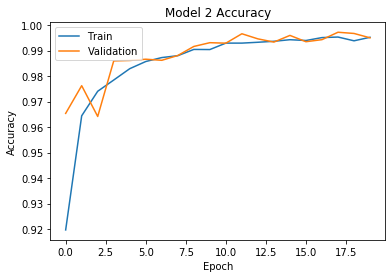

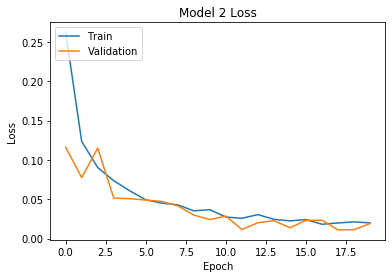

In [21]:
plt.plot(history2.history['categorical_accuracy'])
plt.plot(history2.history['val_categorical_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **4 layers, 500 nodes**

The below model has 4 dense layers - 3 of the layers have 500 nodes and the output layer has 10 nodes.  The model was trained using 20 epochs.

In [22]:
nn3_start_time = time()

model3 = tf.keras.Sequential()
model3.add(layers.Dense(500, input_dim=784, activation='relu')) #layer 1 
model3.add(layers.Dense(500, activation='relu')) #layer 2
model3.add(layers.Dense(500, activation='relu')) #layer 3
model3.add(layers.Dense(10, activation='softmax')) #output layer
model3.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history3=model3.fit(x_array, keras_y, epochs=20, validation_data=(x_array, keras_y))

nn3_elapsed_time = time() - nn3_start_time
print("Time elapsed: {:.3f}".format(nn3_elapsed_time))

Train on 42000 samples, validate on 42000 samples
Epoch 1/20
42000/42000 [==============================] - 18s 428us/sample - loss: 0.2220 - categorical_accuracy: 0.9316 - val_loss: 0.0946 - val_categorical_accuracy: 0.9712
Epoch 2/20
42000/42000 [==============================] - 17s 408us/sample - loss: 0.1001 - categorical_accuracy: 0.9690 - val_loss: 0.0592 - val_categorical_accuracy: 0.9818
Epoch 3/20
42000/42000 [==============================] - 17s 410us/sample - loss: 0.0713 - categorical_accuracy: 0.9783 - val_loss: 0.0561 - val_categorical_accuracy: 0.9823
Epoch 4/20
42000/42000 [==============================] - 17s 408us/sample - loss: 0.0527 - categorical_accuracy: 0.9841 - val_loss: 0.0426 - val_categorical_accuracy: 0.9865
Epoch 5/20
42000/42000 [==============================] - 17s 414us/sample - loss: 0.0476 - categorical_accuracy: 0.9850 - val_loss: 0.0351 - val_categorical_accuracy: 0.9888
Epoch 6/20
42000/42000 [==============================] - 18s 420us/sample 

In [23]:
y_pred3 = model3.predict_classes(test)
print(y_pred3[:10])

df_nn3=pd.DataFrame({'ImageID' : pd.Series(range(1,28001)), 'Label': y_pred3})
df_nn3.to_csv('nn3.csv', index=False)

#Kaggle .97685 - username: Jenna Honeywell

[2 0 9 9 3 7 0 3 0 3]


In [24]:
mypred3=model3.predict(x_array)
mypred3=mypred3.astype(int)
delta=abs(mypred3-keras_y.astype(int))
bynum=sum(delta)
tot=sum(bynum)
print("Total Error %: ", tot/(10000*10), "\nTotal Misclass by #", bynum)

Total Error %:  0.0603 
Total Misclass by # [ 360  197  377  484  496  510  179  955  783 1689]


In [25]:
mytable3=pd.DataFrame(history3.history)
mytable3

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
0,0.221972,0.931619,0.094554,0.971190
1,0.100101,0.968952,0.059242,0.981786
2,0.071347,0.978286,0.056118,0.982262
3,0.052689,0.984119,0.042554,0.986452
4,0.047645,0.985048,0.035136,0.988762
5,0.039075,0.988190,0.023799,0.992524
6,0.035341,0.989476,0.026267,0.992619
7,0.029415,0.991071,0.052203,0.985167
8,0.028925,0.990810,0.030337,0.991310
9,0.024833,0.992952,0.017519,0.994976


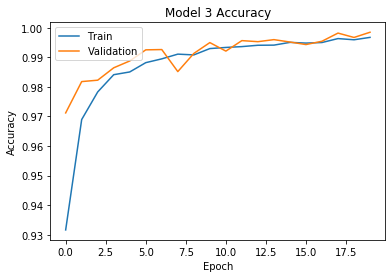

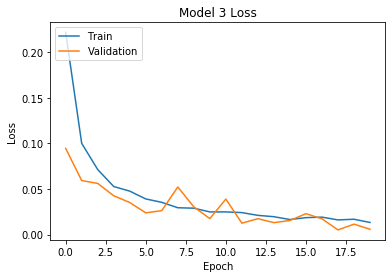

In [26]:
plt.plot(history3.history['categorical_accuracy'])
plt.plot(history3.history['val_categorical_accuracy'])
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model 3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **6 layers, 500 nodes**

The below model has 6 dense layers - 5 of the layers have 500 nodes and the output layer has 10 nodes.  The model was trained using 20 epochs.

In [27]:
nn4_start_time = time()

model4 = tf.keras.Sequential()
model4.add(layers.Dense(500, input_dim=784, activation='relu')) #layer 1 
model4.add(layers.Dense(500, activation='relu')) #layer 2
model4.add(layers.Dense(500, activation='relu')) #layer 3
model4.add(layers.Dense(500, activation='relu')) #layer 4
model4.add(layers.Dense(500, activation='relu')) #layer 5
model4.add(layers.Dense(10, activation='softmax')) #output layer
model4.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history4=model4.fit(x_array, keras_y, epochs=20, validation_data=(x_array, keras_y))

nn4_elapsed_time = time() - nn4_start_time
print("Time elapsed: {:.3f}".format(nn4_elapsed_time))

Train on 42000 samples, validate on 42000 samples
Epoch 1/20
42000/42000 [==============================] - 25s 591us/sample - loss: 0.2627 - categorical_accuracy: 0.9223 - val_loss: 0.1308 - val_categorical_accuracy: 0.9608
Epoch 2/20
42000/42000 [==============================] - 24s 582us/sample - loss: 0.1266 - categorical_accuracy: 0.9644 - val_loss: 0.0919 - val_categorical_accuracy: 0.9744
Epoch 3/20
42000/42000 [==============================] - 24s 581us/sample - loss: 0.0939 - categorical_accuracy: 0.9748 - val_loss: 0.0622 - val_categorical_accuracy: 0.9831
Epoch 4/20
42000/42000 [==============================] - 24s 582us/sample - loss: 0.0780 - categorical_accuracy: 0.9788 - val_loss: 0.0679 - val_categorical_accuracy: 0.9800
Epoch 5/20
42000/42000 [==============================] - 24s 582us/sample - loss: 0.0658 - categorical_accuracy: 0.9817 - val_loss: 0.0617 - val_categorical_accuracy: 0.9828
Epoch 6/20
42000/42000 [==============================] - 24s 579us/sample 

In [28]:
y_pred4 = model4.predict_classes(test)
print(y_pred4[:10])

df_nn4=pd.DataFrame({'ImageID' : pd.Series(range(1,28001)), 'Label': y_pred4})
df_nn4.to_csv('nn4.csv', index=False)


#TEST ON KAGGLE
#Kaggle .97685 - username: Jenna Honeywell


#Compilation of various Kaggle test scores (some omitted from this submission)
#Kaggle .98028 3 layers, 300 nodes, 20 epochs
#Kaggle .97700 3 layers, 300 nodes, 15 epochs
#Kaggle .97714 3 layers, 300 nodes, 30 epochs
#Kaggle .97685 3 layers, 500 nodes, 20 epochs
#Kaggle .97685 5 layers, 500 nodes, 20 epochs
#Kaggle .97514 3 layers, 200 nodes, 20 epochs
#Kaggle .97514 5 layers, 300 nodes, 20 epochs
#Kaggle .97242 3 layers, 150 nodes, 20 epochs

[2 0 9 9 3 7 0 3 0 3]


In [29]:
mypred4=model4.predict(x_array)
mypred4=mypred4.astype(int)
delta=abs(mypred4-keras_y.astype(int))
bynum=sum(delta)
tot=sum(bynum)
print("Total Error %: ", tot/(10000*10), "\nTotal Misclass by #", bynum)

Total Error %:  0.05828 
Total Misclass by # [ 214  215  162  445 1020  688  529  670  853 1032]


In [30]:
mytable4=pd.DataFrame(history4.history)
mytable4

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
0,0.262658,0.922333,0.130810,0.960786
1,0.126639,0.964381,0.091904,0.974357
2,0.093880,0.974833,0.062221,0.983095
3,0.078050,0.978786,0.067871,0.979976
4,0.065750,0.981714,0.061672,0.982762
5,0.055478,0.985333,0.036774,0.990286
6,0.050314,0.986595,0.031316,0.991833
7,0.044507,0.988286,0.034265,0.991786
8,0.043591,0.988905,0.034406,0.991048
9,0.040389,0.990452,0.026869,0.993595


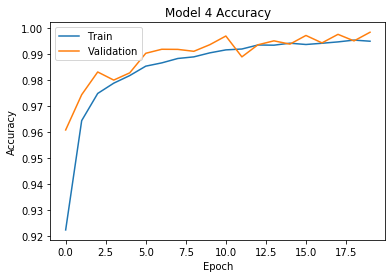

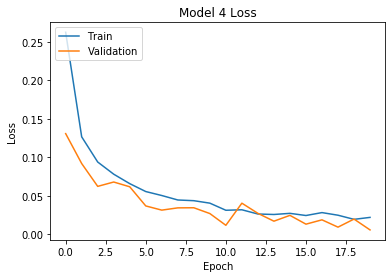

In [31]:
plt.plot(history4.history['categorical_accuracy'])
plt.plot(history4.history['val_categorical_accuracy'])
plt.title('Model 4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model 4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [37]:
#Summary Table

#summary_data = [
    #["Number of Layers", "Nodes per Layer", "Processing Time", "Training Set Accuracy", "Test Set Accuracy"]


summary_data = {'Number of Layers':  ['4', '6', '4', '6'],
        'Nodes per Layer': ['300', '300','500', '500'],
        'Processing Time': ['182.464 sec', '258.397 sec', '347.204 sec', '490.118 sec'],
        'Categorical Accuracy': ['.9963', '.9952', '.9967', '.9949'],
        'Val Categorical Accuracy': ['.9972', '.9950', '.9985', '.9984'],
        'Kaggle (Test) Accuracy': ['.98028', '.97514', '.97685', '.97685']
                 }

summary_df = pd.DataFrame (summary_data, columns = ['Number of Layers','Nodes per Layer', 'Processing Time', 'Categorical Accuracy', 'Val Categorical Accuracy', 'Kaggle (Test) Accuracy'])



In [38]:
summary_df

,Number of Layers,Nodes per Layer,Processing Time,Categorical Accuracy,Val Categorical Accuracy,Kaggle (Test) Accuracy
0,4,300,182.464 sec,.9963,.9972,.98028
1,6,300,258.397 sec,.9952,.9950,.97514
2,4,500,347.204 sec,.9967,.9985,.97685
3,6,500,490.118 sec,.9949,.9984,.97685
